## Periodic kernel

Periodic kernel is defined as the exponential sine squared kernel:

$$
K(\mathbf{x}, \mathbf{y}) = \exp ( \frac{-2}{l^2} \sin^{2} ( \frac{\pi}{p} | \mathbf{x}- \mathbf{y} | ) )
$$

In [1]:
from sympy import *

l, p, x, y = symbols("l p x y")
i, n, m = symbols("i n m", integer=True)
init_printing(use_unicode=True)

In [2]:
from sympy.concrete.gosper import gosper_sum

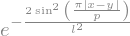

In [3]:
K = exp(- (2 / l ** 2) * sin(pi / p * abs(x - y)) ** 2)
K

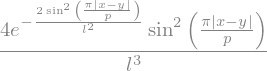

In [19]:
diff(K, l)

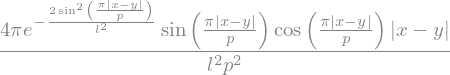

In [20]:
diff(K, p)

In [25]:
from sympy.vector import CoordSys3D

N = CoordSys3D("N")

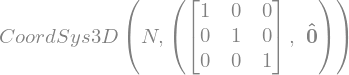

In [26]:
N

In [ ]:
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import ExpSineSquared

while True:
    xtr = np.random.rand(25,25)
    ytr = np.random.rand(25)
    model = gp.GaussianProcessRegressor(kernel=ExpSineSquared(),
                                                alpha=1e-5,
                                                n_restarts_optimizer=10,
                                                normalize_y=True)
    model.fit(xtr, ytr)

/home/glemaitre/Documents/packages/scikit-learn/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/glemaitre/Documents/packages/scikit-learn/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/glemaitre/Documents/packages/scikit-learn/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def f(x): return(np.array([np.sin(7 * x), x ** 4]))

kernel = RBF()
gp = GaussianProcessRegressor(kernel=RBF(length_scale=15.7), n_restarts_optimizer=50,
                         normalize_y=True) # (works when normalize_y is False)

X = np.linspace(0, 5, 5)
gp.fit(np.atleast_2d(X).T, f(X).T)

newx = np.atleast_2d([1, 2, 3, 4]).T
gp.predict(newx, return_std=False)
gp.predict(newx, return_std=True)

/home/glemaitre/Documents/packages/scikit-learn/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


ValueError: operands could not be broadcast together with shapes (4,) (2,) 

## Experiment

### Compute the kernel matrix

In [31]:
import numpy as np

r = np.linspace(0, 1, num=4)
train_x, train_y = np.meshgrid(r, r)
X = np.stack((train_x.flatten(), train_y.flatten()), axis=-1)[:6, :]

In [32]:
periodicity = 1.5
length_scale = 0.5

In [33]:
from sklearn.gaussian_process.kernels import ExpSineSquared

kernel_sklearn = ExpSineSquared(
    periodicity=periodicity, length_scale=length_scale,
)
K_sklearn = kernel_sklearn(X)
K_sklearn

array([[1.00000000e+00, 3.66842677e-02, 4.26981239e-04, 2.47875218e-03,
        3.66842677e-02, 1.34573550e-03],
       [3.66842677e-02, 1.00000000e+00, 3.66842677e-02, 4.26981239e-04,
        1.34573550e-03, 3.66842677e-02],
       [4.26981239e-04, 3.66842677e-02, 1.00000000e+00, 3.66842677e-02,
        1.56634941e-05, 1.34573550e-03],
       [2.47875218e-03, 4.26981239e-04, 3.66842677e-02, 1.00000000e+00,
        9.09312084e-05, 1.56634941e-05],
       [3.66842677e-02, 1.34573550e-03, 1.56634941e-05, 9.09312084e-05,
        1.00000000e+00, 3.66842677e-02],
       [1.34573550e-03, 3.66842677e-02, 1.34573550e-03, 1.56634941e-05,
        3.66842677e-02, 1.00000000e+00]])

In [53]:
np.linalg.eigh(K_sklearn)[0]

array([0.92158295, 0.95878265, 0.99776055, 0.99981749, 1.04016318,
       1.08189318])

In [34]:
from tensorflow_probability import math

kernel_tfp = math.psd_kernels.ExpSinSquared(
   period=periodicity, length_scale=length_scale
)
K_tfp = kernel_tfp.matrix(X, X)
K_tfp.numpy()

array([[1.0000000e+00, 3.6684260e-02, 4.2698105e-04, 2.4787546e-03,
        3.6684260e-02, 1.3457348e-03],
       [3.6684260e-02, 1.0000000e+00, 3.6684260e-02, 4.2698145e-04,
        1.3457348e-03, 3.6684260e-02],
       [4.2698105e-04, 3.6684260e-02, 1.0000000e+00, 3.6684275e-02,
        1.5663483e-05, 1.3457348e-03],
       [2.4787546e-03, 4.2698145e-04, 3.6684275e-02, 1.0000000e+00,
        9.0931273e-05, 1.5663498e-05],
       [3.6684260e-02, 1.3457348e-03, 1.5663483e-05, 9.0931273e-05,
        1.0000000e+00, 3.6684260e-02],
       [1.3457348e-03, 3.6684260e-02, 1.3457348e-03, 1.5663498e-05,
        3.6684260e-02, 1.0000000e+00]], dtype=float32)

In [52]:
np.linalg.eigh(K_tfp.numpy())[0]

array([0.92158294, 0.9587827 , 0.99776053, 0.9998175 , 1.0401632 ,
       1.0818932 ], dtype=float32)

In [50]:
import torch
from gpytorch.kernels import PeriodicKernel

kernel_pytorch = PeriodicKernel()
K_pytorch = kernel_pytorch(torch.from_numpy(X))
K_pytorch.numpy()

array([[1.        , 0.05641548, 0.95948005, 0.06124461, 0.05641548,
        0.12793895],
       [0.05641548, 1.        , 0.05641548, 0.95948005, 0.12793895,
        0.05641548],
       [0.95948005, 0.05641548, 1.        , 0.05641548, 0.85336358,
        0.12793895],
       [0.06124461, 0.95948005, 0.05641548, 1.        , 0.05651977,
        0.85336358],
       [0.05641548, 0.12793895, 0.85336358, 0.05651977, 1.        ,
        0.05641548],
       [0.12793895, 0.05641548, 0.12793895, 0.85336358, 0.05641548,
        1.        ]])

In [51]:
np.linalg.eigh(K_pytorch.numpy())[0]

array([-0.27196781, -0.24495335,  0.87257204,  1.01420914,  2.08863012,
        2.54150987])

### Compute the gradient

In [55]:
import tensorflow as tf

periodicity = tf.constant(1.5)
length_scale = tf.constant(0.5)

In [60]:
with tf.GradientTape() as g:
    g.watch(periodicity)
    g.watch(length_scale)
    kernel = math.psd_kernels.ExpSinSquared(period=periodicity, length_scale=length_scale)
g.gradient(kernel, periodicity)

TypeError: Cannot convert value <tfp.math.psd_kernels.ExpSinSquared 'ExpSinSquared' batch_shape=() feature_ndims=1 dtype=float32> to a TensorFlow DType.